<a href="https://colab.research.google.com/github/BilalAsifB/Computer_Vision_Labs/blob/main/CV_LAB_5A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Task 1:
#### **Thresholding-Based Segmentation**
**Scenario:** You have a grayscale medical X-ray image of a bone fracture. The area of interest (the fracture) is
significantly darker than the surrounding bone. Perform thresholding-based segmentation to isolate the fracture.

In [22]:
img = cv2.imread('/content/bone_fracture.PNG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [23]:
blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

In [24]:
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
clean = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

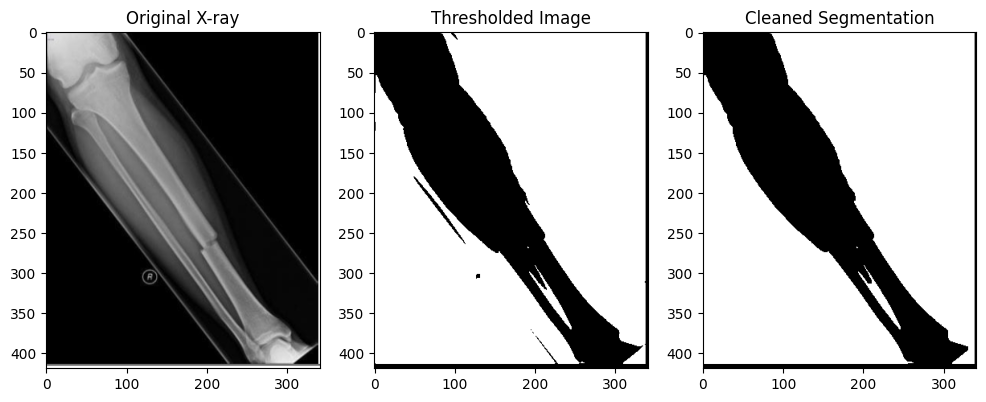

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original X-ray')

plt.subplot(1,3,2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(1,3,3)
plt.imshow(clean, cmap='gray')
plt.title('Cleaned Segmentation')

plt.show()

## Task 2:
#### **Region Growing Intensity-Based Segmentation**
**Scenario:** You have a microscopic image of cells. Choose a seed point in one of the cells, and perform region
growing-based segmentation to identify and separate that cell from the rest.

In [47]:
img = cv2.imread('/content/cells.PNG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [48]:
seed_point = (150, 120)
tolerance = 15

In [49]:
segmented = np.zeros_like(img_gray, np.uint8)
visited = np.zeros_like(img_gray, np.bool_)
stack = [seed_point]
seed_value = img_gray[seed_point[1], seed_point[0]]

In [50]:
while stack:
    x, y = stack.pop()
    if visited[y, x]:
        continue
    visited[y, x] = True
    if abs(int(img_gray[y, x]) - int(seed_value)) < tolerance:
        segmented[y, x] = 255
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < img_gray.shape[1] and 0 <= ny < img_gray.shape[0]:
                    stack.append((nx, ny))

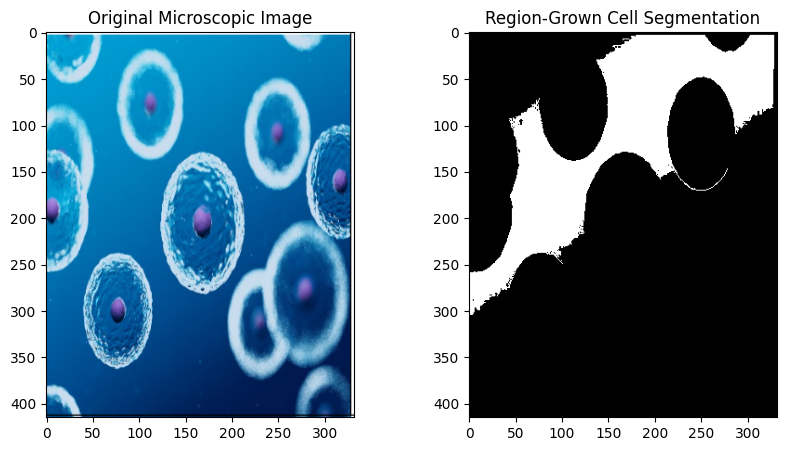

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Microscopic Image')

plt.subplot(1,2,2)
plt.imshow(segmented, cmap='gray')
plt.title('Region-Grown Cell Segmentation')

plt.show()

## Task 3:
#### **Watershed Segmentation**
**Scenario:** You have an image of overlapping coins on a table. Perform watershed segmentation to separate and count
the individual coins.

In [137]:
img = cv2.imread('/content/coins.PNG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [138]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [139]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [140]:
sure_bg = cv2.dilate(opening, kernel, iterations=10)

In [141]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.18 * dist_transform.max(), 255, 0)

In [142]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [143]:
ret, markers = cv2.connectedComponents(sure_fg)

In [144]:
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Red boundaries

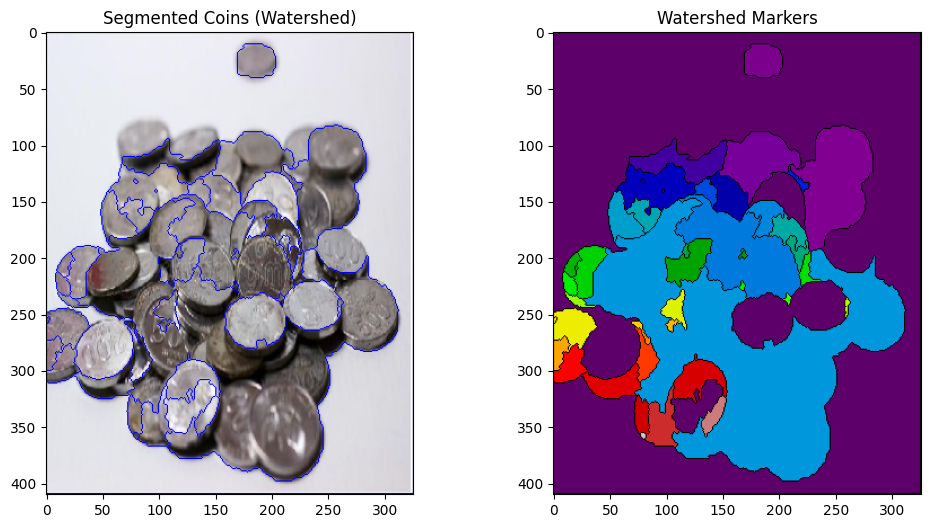

In [145]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Segmented Coins (Watershed)')

plt.subplot(1,2,2)
plt.imshow(markers, cmap='nipy_spectral')
plt.title('Watershed Markers')

plt.show()

In [146]:
num_coins = ret - 1
print("Estimated number of coins:", num_coins)

Estimated number of coins: 45


## Task 4:
#### **Cluster-Based Segmentation**
**Scenario:** You have an image of colorful flowers in a garden. Perform cluster-based segmentation to separate different
types of flowers based on color.

In [147]:
img = cv2.imread('/content/flower_bed.PNG')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [148]:
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [164]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [165]:
k = 4
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [166]:
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)

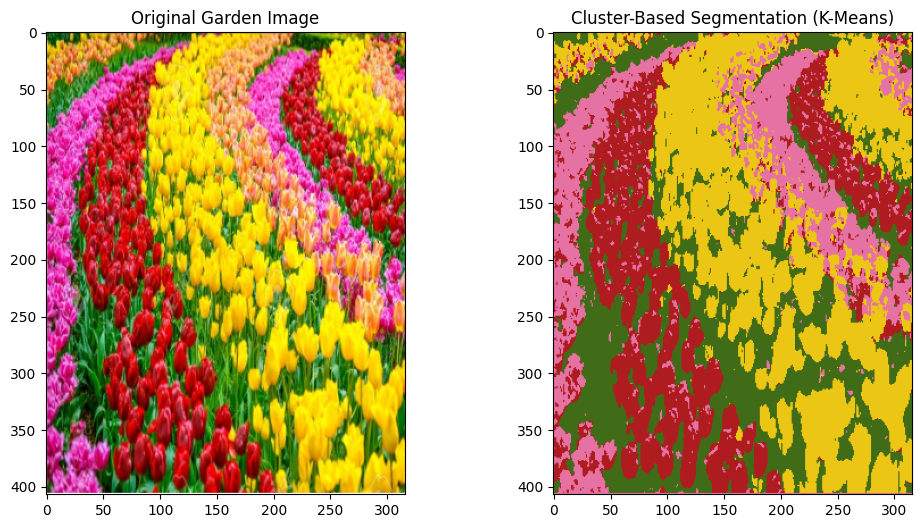

In [167]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original Garden Image')

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title('Cluster-Based Segmentation (K-Means)')

plt.show()